In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import compare_model as cm

params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 18,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   } 
plt.rcParams.update(params)

In [2]:
# import verification data
ver_data = list(np.loadtxt("../Data/Verification_data.csv",dtype=int,delimiter=',',skiprows=1,usecols=(8)))

The probability of true outcome is 0.351
The probability of false outcome is 0.649


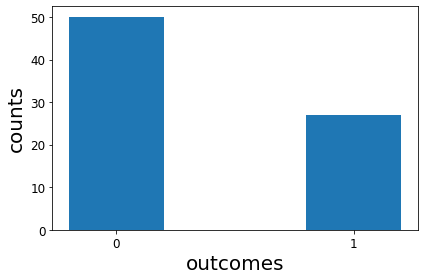

In [3]:
# classify the verification dataset
p_0,p_1 = cm.binary_distribution(ver_data)

## Check the prediction from the Random Forest model

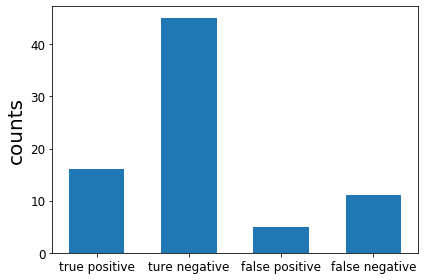

The sensitivity of the model is 0.593
The specificity of the model is 0.900
True positive: 16, True negative: 45, False positive: 5, False negative: 11
Accuracy: 0.792208


In [6]:
# import predicted data
pre_data = np.loadtxt('../Random_forest/RandomForest_Prediction.txt')
# determine the correctness of the prediction from the model 
classification_random,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification_random[0],classification_random[1],classification_random[2],classification_random[3]))
print('Accuracy: %.6f'%((classification_random[0]+classification_random[1])/np.sum(classification_random)))

## Check the prediction from the weighting model

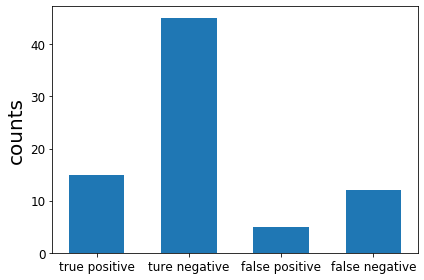

The sensitivity of the model is 0.556
The specificity of the model is 0.900
True positive: 15, True negative: 45, False positive: 5, False negative: 12
Accuracy: 0.779221


In [8]:
# import predicted data
pre_data = np.loadtxt('../Weighting/Prediction_weight.txt')
classification_weight,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification_weight[0],classification_weight[1],classification_weight[2],classification_weight[3]))
print('Accuracy: %.6f'%((classification_weight[0]+classification_weight[1])/np.sum(classification_weight)))


## Check the prediction from the scoring model

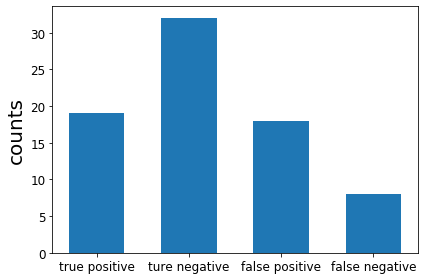

The sensitivity of the model is 0.704
The specificity of the model is 0.640
True positive: 19, True negative: 32, False positive: 18, False negative: 8
Accuracy: 0.662338


In [9]:
# import predicted data
pre_data = np.loadtxt('../Ka Folder/Prediction_score.txt')
classification_score,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification_score[0],classification_score[1],classification_score[2],classification_score[3]))
print('Accuracy: %.6f'%((classification_score[0]+classification_score[1])/np.sum(classification_score)))

## The optimized weiting method

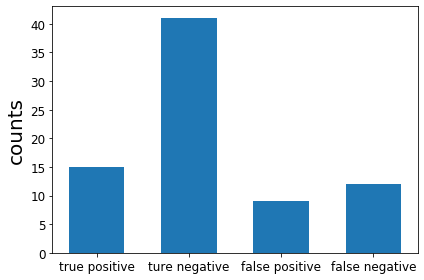

The sensitivity of the model is 0.556
The specificity of the model is 0.820
True positive: 15, True negative: 41, False positive: 9, False negative: 12
Accuracy: 0.727273


In [10]:
# import predicted data
pre_data = np.loadtxt('../Weighting/Prediction_weight_focus.txt')
classification,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification[0],classification[1],classification[2],classification[3]))
print('Accuracy: %.6f'%((classification[0]+classification[1])/np.sum(classification)))

/Users/zhangzhihao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


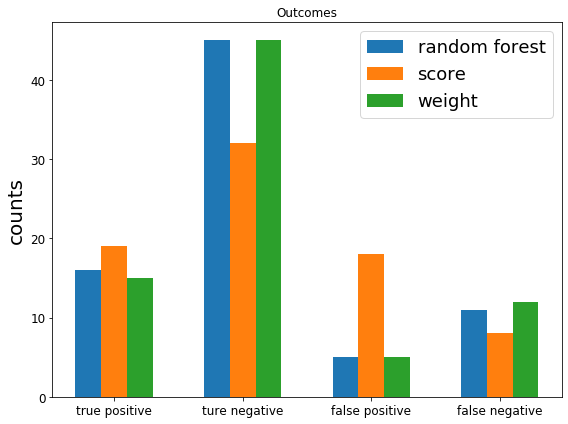

In [11]:
# compare three model
_ind = np.linspace(0.5,3.5,4)
_width = 0.2
_labels = ['true positive','ture negative','false positive','false negative']

fig = plt.figure(figsize=[8,6],tight_layout=True)
plt.title('Outcomes')
ax = plt.axes()

ax.bar(_ind-0.2,classification_random,_width,label='random forest')
ax.bar(_ind,classification_score,_width,label='score')
ax.bar(_ind+0.2,classification_weight,_width,label='weight')

ax.set_xticks(_ind)
ax.set_xticklabels(_labels)
plt.legend()
plt.ylabel('counts')
#plt.savefig('compare_results.png')
plt.show()